In [14]:
import sys
sys.path.append('..')
from Python3Code.Chapter3.KalmanFilters import KalmanFilters
sys.path.append('../Python3Code')
from Python3Code.Chapter3.DataTransformation import PrincipalComponentAnalysis, LowPassFilter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load data
acc = pd.read_csv('data/phone/20230608/Linear Accelerometer.csv')
gyro = pd.read_csv('data/phone/20230608/Gyroscope.csv')
baro = pd.read_csv('data/phone/20230608/Barometer.csv')
loc = pd.read_csv('data/phone/20230608/Location.csv')

In [4]:
# define stroke slices
free_style = slice(750, 1125)
breast_stroke = slice(1125, 1400)
back_stroke = slice(1400, 1750)

In [6]:
# apply Kalman filter
kf = KalmanFilters()
acc = kf.apply_kalman_filter(acc, 'X (m/s^2)')
acc = kf.apply_kalman_filter(acc, 'Y (m/s^2)')
acc = kf.apply_kalman_filter(acc, 'Z (m/s^2)')
gyro = kf.apply_kalman_filter(gyro, 'X (rad/s)')
gyro = kf.apply_kalman_filter(gyro, 'Y (rad/s)')
gyro = kf.apply_kalman_filter(gyro, 'Z (rad/s)')
baro = kf.apply_kalman_filter(baro, 'X (hPa)')
loc = kf.apply_kalman_filter(loc, 'Velocity (m/s)')

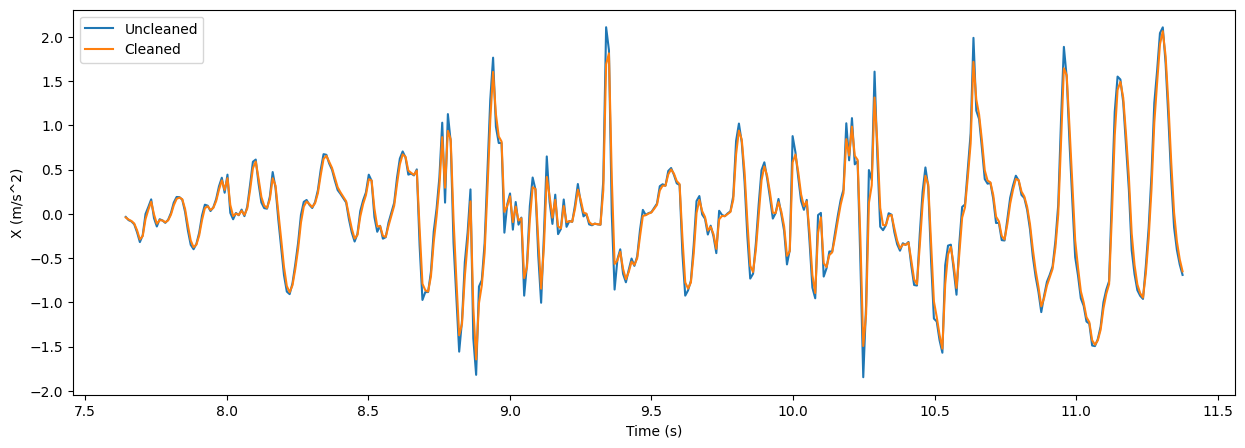

In [7]:
# plot uncleaned and cleaned data in same plot
plt.figure(figsize=(15, 5))
plt.plot(acc['Time (s)'][free_style], acc['X (m/s^2)'][free_style], label='Uncleaned')
plt.plot(acc['Time (s)'][free_style], acc['X (m/s^2)_kalman'][free_style], label='Cleaned')
plt.xlabel('Time (s)')
plt.ylabel('X (m/s^2)')
plt.legend()

In [20]:
# apply low pass filter
lpf = LowPassFilter()
acc = lpf.low_pass_filter(acc, 'X (m/s^2)_kalman', 100, 20, order=20)
acc = lpf.low_pass_filter(acc, 'Y (m/s^2)_kalman', 100, 20, order=20)
acc = lpf.low_pass_filter(acc, 'Z (m/s^2)_kalman', 100, 20, order=20)
gyro = lpf.low_pass_filter(gyro, 'X (rad/s)_kalman', 100, 20, order=20)
gyro = lpf.low_pass_filter(gyro, 'Y (rad/s)_kalman', 100, 20, order=20)
gyro = lpf.low_pass_filter(gyro, 'Z (rad/s)_kalman', 100, 20, order=20)
baro = lpf.low_pass_filter(baro, 'X (hPa)_kalman', 100, 20, order=20)
loc = lpf.low_pass_filter(loc, 'Velocity (m/s)_kalman', 100, 20, order=20)

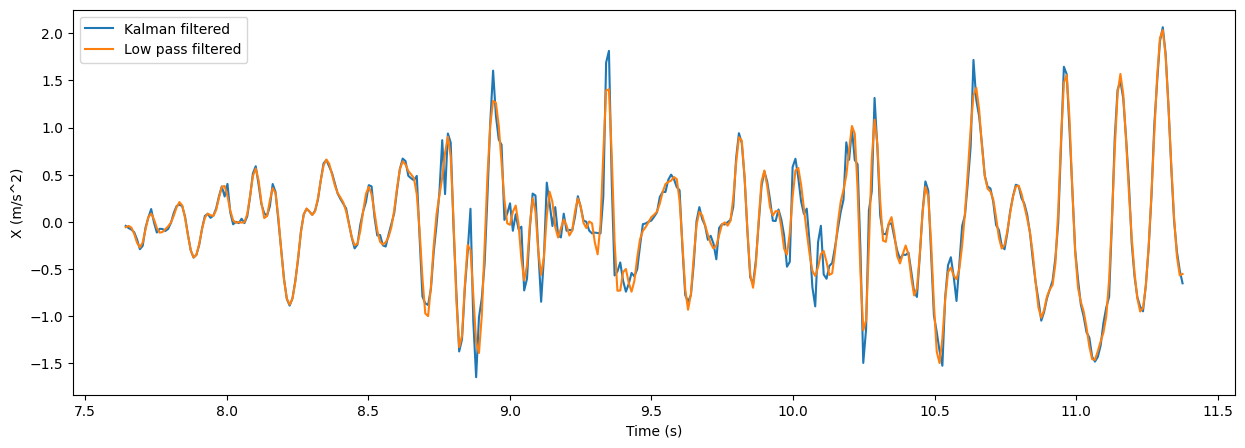

In [21]:
# plot kalman filtered and low pass filtered data in same plot
plt.figure(figsize=(15, 5))
plt.plot(acc['Time (s)'][free_style], acc['X (m/s^2)_kalman'][free_style], label='Kalman filtered')
plt.plot(acc['Time (s)'][free_style], acc['X (m/s^2)_kalman_lowpass'][free_style], label='Low pass filtered')
plt.xlabel('Time (s)')
plt.ylabel('X (m/s^2)')
plt.legend()

In [22]:
# apply PCA
pca = PrincipalComponentAnalysis()
acc = pca.apply_pca(acc, ['X (m/s^2)_kalman_lowpass', 'Y (m/s^2)_kalman_lowpass', 'Z (m/s^2)_kalman_lowpass'], 2)
gyro = pca.apply_pca(gyro, ['X (rad/s)_kalman_lowpass', 'Y (rad/s)_kalman_lowpass', 'Z (rad/s)_kalman_lowpass'], 2)

In [23]:
# export to csv
acc.to_csv('data/phone/20230608/Linear Accelerometer_cleaned.csv', index=False)
gyro.to_csv('data/phone/20230608/Gyroscope_cleaned.csv', index=False)
baro.to_csv('data/phone/20230608/Barometer_cleaned.csv', index=False)
loc.to_csv('data/phone/20230608/Location_cleaned.csv', index=False)